In [1]:
from swarms import SizeDistribution
from swarms import CollSwarm
from numpy import linspace, zeros, logspace, array
import matplotlib.pyplot as plt

# Jupiter: An Example

For the following plots, the specifications of Jupiter will be used to demonstrate the different possible plots that swarms.py can produce. 

In [1]:
Dmin = 12e-6; Dmax = 15e4; M_init = 7.37307e19

jupiter = SizeDistribution(Dmin, Dmax, M0=M_init)

NameError: name 'SizeDistribution' is not defined

In [3]:
initial_swarm_mass = jupiter.Mtot()
initial_swarm_area = jupiter.Atot()
print("Swarm mass = {0:.5e} kg".format(initial_swarm_mass))
print("Swarm area = {0:.5e} m^2".format(initial_swarm_area))

Swarm mass = 7.39324e+19 kg
Swarm area = 9.18122e+16 m^2


## Area Plot

One can plot the total surface area of a swarm over time by repeatedly updating the swarm for every needed time step and record the specific area at that time. There is the option to specify a dynamic maximum object size that would decrease over time as specified in Kennedy 2010.

In [2]:
M0 = 0.00002 * 7.34767309e22; Dt = 100.; Dmax = 150000.; L_s = 3.828e26;
M_s = 1.989e30; M_pl = 1.89587112e27; a_pl = 7.7792e11
R_pl = 6.9911e7; eta = 0.4; Nstr = 6.; d_pl = a_pl

jupiter_correct = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=True)#, alpha=1.2)
jupiter_no_correct = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=False)#, alpha=1.2)

In [3]:
time = linspace(0, 1e10, 50000)
area_correct = zeros(50000)
area_no_correct = zeros(50000)

for i in range(len(time)):
    a = jupiter_correct.computeAtot()*4.4683677582981e-23 # change units into AU
    b = jupiter_no_correct.computeAtot()*4.4683677582981e-23 # change units into AU
    area_correct[i] = a
    area_no_correct[i] = b
    jupiter_correct.updateSwarm(time[i])
    jupiter_no_correct.updateSwarm(time[i])

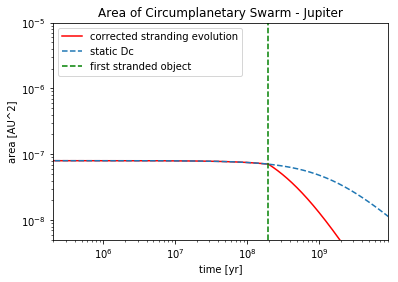

In [4]:
plt.loglog(time, area_correct, 'r', label="corrected stranding evolution")
plt.loglog(time, area_no_correct, ls='--', label="static Dc")
plt.axvline(jupiter_correct.tnleft, color='g', ls='--', label="first stranded object")
plt.xlabel("time [yr]")
plt.ylabel("area [AU^2]")
plt.title("Area of Circumplanetary Swarm - Jupiter")
plt.legend()
plt.xlim([2e5, 9e9])
plt.ylim([5e-9, 1e-5])
plt.show()

## Number Density Plot

Since it is possible to compute the number of objects in the swarm at any time with our code, an other possible plot that can be made is a size-distribution plot for logarithmic spaced times. 

In [8]:
jupiter_num = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=True, alpha=1.2)

In [9]:
drange = linspace(0.1, 250000, 5000)
time_log = logspace(0, 10, 30)
num_distribution = []
Dc_list = []
for i in range(len(time_log)):
    #jupiter_num.tnleft = 0.5e8
    jupiter_num.updateSwarm(time_log[i])
    num = []
    dcc = []
    for j in range(len(drange)):
        dcc.append(jupiter_num.swarm.Dc)
        num.append(jupiter_num.computen(drange[j]))
    num_distribution.append(num)
    Dc_list.append(dcc)
    

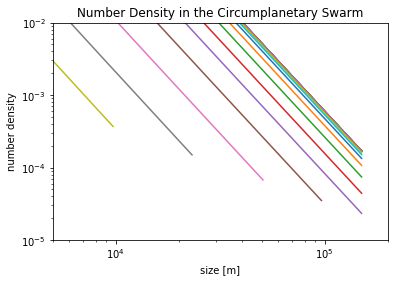

In [10]:
drange = array(drange)
for i in range(len(num_distribution)):
    num_dist = []
    prev_drange = []
    for j in range(len(num_distribution[i])):
        #print("drange = ", drange[j])
        #print("Dc = ", Dc_list[j])
        if drange[j] < Dc_list[i][j]:
            prev_drange.append(drange[j])
            num_dist.append(num_distribution[i][j])
    plt.loglog(prev_drange, num_dist)
#plt.loglog(Dc_list)
#print(Dc_list)
plt.xlim([5000, 200000])
plt.ylim([1e-5, 1e-2])
plt.xlabel("size [m]")
plt.ylabel("number density")
plt.title("Number Density in the Circumplanetary Swarm")
plt.show()

# Observable Quantities

## Flux Computations

We now demonstrate the important computations of thermal radiation flux as well as scattering flux produced by both the planet and the circumplanetary swarm. These values are critical, since they are the observable variables. The distance from the solar system, d_pl, used is 10 pc. We take a Jupiter mass planet orbiting an A5 main-sequence star.  

In [10]:
M0 = 10 * 7.34767309e22; Dt = 100.; Dmax = 250000.; L_s = 20 * 3.828e26;
M_s = 1.86 * 1.989e30; M_pl = 1.89587112e27; a_pl = 7.48e12
R_pl = 6.9911e7; eta = 0.4; Nstr = 6.; d_pl = 3.086e17

jupiter5 = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=True)

jupiter5.updateSwarm(1e7) # Update the swarm to 4.5e9 years. 

waverange = logspace(-7, -3, 200)
Fth_planet = jupiter5.computeFth(waverange, planet=True)/1e-26
Fth_swarm = jupiter5.computeFth(waverange, swarm=True)/1e-26
Fs_planet = jupiter5.computeFs(waverange, 1., 0.52, planet=True)/1e-26
Fs_swarm = jupiter5.computeFs(waverange, 0.32, 0.08, swarm=True)/1e-26

C:\Users\loloynage\Documents\CE-Irregular-Satellites\swarms.py:268: RuntimeWarning: overflow encountered in exp
  b = 1/(exp(h*(c/lamb)/(k_B*T)) - 1)


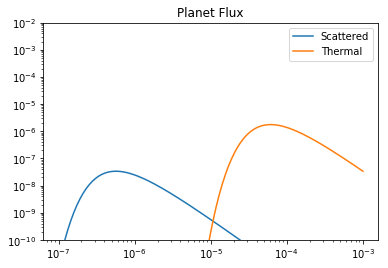

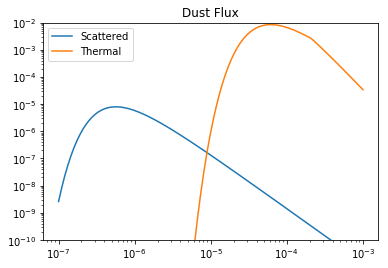

In [9]:
plt.figure(3)
plt.title('Planet Flux')
plt.loglog(waverange, Fs_planet, label="Scattered")
plt.loglog(waverange, Fth_planet, label="Thermal")
plt.ylim([10e-11, 10e-3])
plt.legend()
plt.show()

plt.figure(4)
plt.title('Dust Flux')
plt.loglog(waverange, Fs_swarm, label="Scattered")
plt.loglog(waverange, Fth_swarm, label="Thermal")
plt.ylim([10e-11, 10e-3])
plt.legend()
plt.show()

# Evolution of Debris Population

In [6]:
M0 = 0.001 * 7.3477e22; Dt = 100.; Dmax = 150000.; L_s = 3.828e26;
M_s = 1.989e30; M_pl = 1.89587112e27; a_pl = 7.7792e11
R_pl = 6.9911e7; eta = 0.4; Nstr = 6.; d_pl = a_pl

jupiter6 = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=True, alpha=1.2)

drange = linspace(0.01, 1.5e5, 2500)
drange_Dc_tot = []
#drange = logspace(2, 6, 1000)
time_log = logspace(6, 10, 10)
total_amount = []
# Testing
# num = []
#print(jupiter6.computeNtot(dlow=1000))
# for j in range(len(drange)):
#    num.append(jupiter6.computeNtot(dlow=drange[j]))
# total_amount.append(num)

for i in range(len(time_log)):
    jupiter6.updateSwarm(time_log[i])
    num = []
    drange_Dc = []
    print(i)
    for d in drange:#j in range(len(drange)):
        Xc_val = jupiter6.computeXc()
        Mt = jupiter6.swarm.DMtot(jupiter6.Rcc0, time_log[i], jupiter6.tnleft, Xc_val, jupiter6.M_init, jupiter6.correction)
        jupiter6.swarm.M0 = Mt
        #jupiter6.swarm.compute_kg_from_Mtot(Mt)
        #jupiter6.swarm.compute_ks_from_kg()
        #jupiter6.updateSwarm2(time_log[i], d)
        #print(jupiter6.swarm.M0)
        #if d >= jupiter6.swarm.Dc:
        num.append(jupiter6.computeNtot(dlow=d)) #Make dhigh explicit
        drange_Dc.append(d)
    drange_Dc_tot.append(drange_Dc)
    total_amount.append(num)

0
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  28362150143085.5
kg_val =  1789530693802.9788
lower =  0
upper =  262633.8136128692
str upper =  0.0
qg =  1.7
k_str =  24.15168900402386
Dmax =  150000.0
Dc =  150000.0
dlow =  1260.5141176470586
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  28362150143085.5
kg_val =  1789530693802.9788
lower =  0
upper =  36130.12643300287
str upper =  0.0
qg =  1.7
k_str =  24.15168900402386
Dmax = 

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

lower =  0
upper =  8.790075438322116
str upper =  0.0
qg =  1.7
k_str =  24.15168900402386
Dmax =  150000.0
Dc =  150000.0
dlow =  114465.78868347338
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < 

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  26835848287077.227
kg_val =  1693227557208.7617
lower =  0
upper =  235.2108554765555
str upper =  0.0
qg =  1.7
k_str =  22.851972037340957
Dmax =  150000.0
Dc =  150000.0
dlow =  33973.59717086834
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  2

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  23340742029101.2
kg_val =  1472701260887.8953
lower =  0
upper =  610.8732134094147
str upper =  0.0
qg =  1.7
k_str =  19.875726620375136
Dmax =  150000.0
Dc =  150000.0
dlow =  20468.195910364142
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc


	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  23340742029101.2
kg_val =  1472701260887.8953
lower =  0
upper =  33.792457421619055
str upper =  0.0
qg =  1.7
k_str =  19.875726620375136
Dmax =  150000.0
Dc =  150000.0
dlow =  72749.10478991596
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc


qg =  1.7
k_str =  19.875726620375136
Dmax =  150000.0
Dc =  150000.0
dlow =  146518.60767507003
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
3
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  17132063480054.371
kg_val =  1080960127884.1221
lower =  0
upper =  1.1149923460419344
str upper =  0.0
qg =  1.7
k_str =  14.588748281777988
Dmax =  150000.0
Dc =  150000.0
dlow =  139735.8950420168
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < D

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  9845075898066.387
kg_val =  621182294484.993
lower =  0
upper =  2.779953940064131
str upper =  0.0
qg =  1.7
k_str =  8.383539686220802
Dmax =  150000.0
Dc =  150000.0
dlow =  116626.65288515405
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  9845075898066.387
kg_val =  621182294484.993
lower =  0
upper =  2.7435027927492937
str upper =  0.0
qg =  1.7
k_str =  8.383539686220802
Dmax =  150000.0
Dc =  150000.0
dlow =  116926.77291316524
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  9845075898066.387
kg_val =  621182294484.993
lower =  0
upper =  2.6857805845279117
str upper =  0.0
qg =  1.7
k_str =  8.383539686220802
Dmax =  150000.0
Dc =  150000.0
dlow =  117406.96495798317
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow <

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  1313967619071.738
kg_val =  82905751966.24673
lower =  0
upper =  9.460946341549556
str upper =  2.484471863286449
qg =  1.7
k_str =  3.3226527500336593
Dmax =  150000.0
Dc =  89330.51969102371
dlow =  35414.173305322125
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	

	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
ks_val =  1313967619071.738
kg_val =  82905751966.24673
lower =  0
upper =  0
str upper =  1.538294989464071
qg =  1.7
k_str =  3.3226527500336593
Dmax =  150000.0
Dc =  89330.51969102371
dlow =  108823.53215686273
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlo

ks_val =  205488789500.1705
kg_val =  12965466094.347721
lower =  0
upper =  0.9576746539861062
str upper =  6.719743607284528
qg =  1.7
k_str =  3.3226527500336602
Dmax =  150000.0
Dc =  36922.17086172691
dlow =  29471.796750700276
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  205488789500.1705
kg_val =  12965466094.347721
lower =  0
upper =  0.6602556513742841
str upper =  6.719743607284528
qg =  1.7
k_str =  3.3226527500336602
Dmax =  150000.0
Dc =  36922.17086172691
dlow =  31272.516918767502
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  205488789500.1705
kg_val =  12965466094.3477

	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
ks_val =  205488789500.1705
kg_val =  12965466094.347721
lower =  0
upper =  0
str upper =  1.7380561515772375
qg =  1.7
k_str =  3.3226527500336602
Dmax =  150000.0
Dc =  36922.17086172691
dlow =  104381.7557422969
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dl

	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dl

	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dl

	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dl

	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
ks_val =  1848496029.5745194
kg_val =  116632214.61025214
lower =  0
upper =  0
str upper =  1.275920186614524
qg =  1.7
k_str =  3.32265275003366
Dmax =  150000.0
Dc =  3917.562952808411
dlow =  114945.9807282913
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow

In [9]:
print(time_log)

[1.00000000e+06 2.78255940e+06 7.74263683e+06 2.15443469e+07
 5.99484250e+07 1.66810054e+08 4.64158883e+08 1.29154967e+09
 3.59381366e+09 1.00000000e+10]


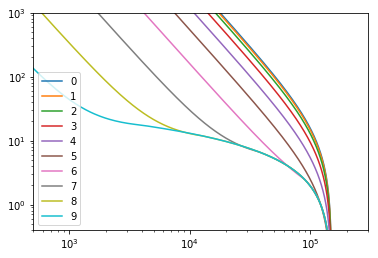

In [7]:
for i in range(len(total_amount)):
    plt.loglog(drange_Dc_tot[i], total_amount[i], label=i)

plt.legend()
plt.ylim([4e-1, 1e3])
plt.xlim([5e2, 3e5])
plt.show()